In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

Example from:
http://setosa.io/ev/principal-component-analysis/

In [2]:
data = pd.io.parsers.read_csv("UK_foods.csv")
data.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [3]:
headers = data['Unnamed: 0'].values.tolist()
print(headers)

new_data = data.drop(['Unnamed: 0'], axis=1)
new_data.head()

regions = new_data.columns.values.tolist()
print(regions)

['Cheese', 'Carcass_meat ', 'Other_meat ', 'Fish', 'Fats_and_oils ', 'Sugars', 'Fresh_potatoes ', 'Fresh_Veg ', 'Other_Veg ', 'Processed_potatoes ', 'Processed_Veg ', 'Fresh_fruit ', 'Cereals ', 'Beverages', 'Soft_drinks ', 'Alcoholic_drinks ', 'Confectionery ']
['England', 'Wales', 'Scotland', 'N.Ireland']


In [4]:
food = pd.DataFrame(new_data.values.T,columns=headers)
food['region'] = regions
food

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery,region
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54,England
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64,Wales
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62,Scotland
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41,N.Ireland


### This is when we want to try PCA!

In [5]:
#Performing PCA without scaling the data (to match the results from the website)
X = pd.DataFrame(food[headers], columns=headers)
# In general, PCA scales the variables to zero-mean (use line below to scale)
# X = pd.DataFrame(scale(food[headers]), columns=headers)

In [6]:
pca = PCA().fit(X)
pca_samples = pca.transform(X)

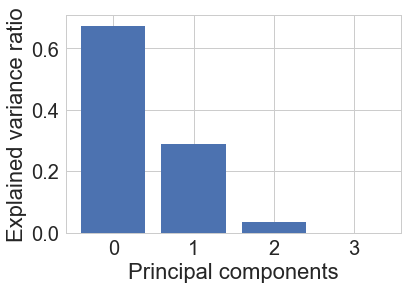

In [7]:
var_exp = pca.explained_variance_ratio_
plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance');
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');

In [8]:
components = pd.DataFrame(pca.components_, columns = headers) 
components

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,-0.056955,0.047928,-0.258917,-0.084415,-0.005194,-0.037621,0.401402,-0.151850,-0.243594,-0.026886,-0.036488,-0.632641,-0.047703,-0.026188,0.232244,-0.463968,-0.029650
1,0.016013,0.013916,-0.015331,-0.050755,-0.095389,-0.043022,-0.715017,-0.144900,-0.225451,0.042851,-0.045452,-0.177741,-0.212600,-0.030561,0.555124,0.113537,0.005950
2,0.023943,0.063671,-0.553849,0.039065,-0.125223,-0.036057,-0.206682,0.213822,-0.053328,-0.073649,0.052892,0.400129,-0.358849,-0.041359,-0.169426,-0.498583,-0.052322
3,-0.409383,0.729482,0.331001,0.022376,0.034512,0.024943,0.021396,0.001607,0.031153,-0.017380,0.021251,0.227657,0.100043,-0.018382,0.222319,-0.273126,0.001891


Text(0.5,1,'influence of original variables(food) upon pc2')

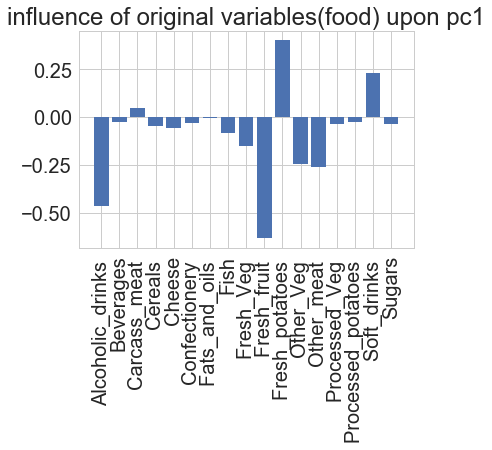

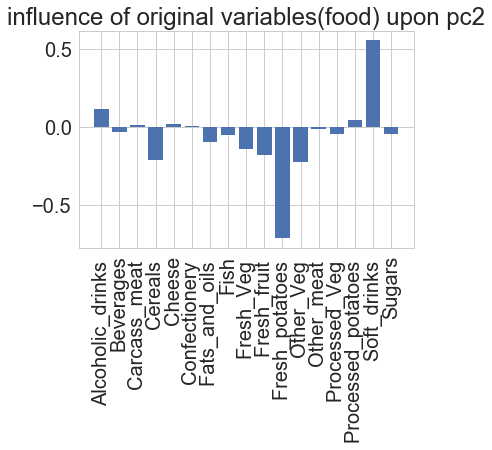

In [9]:
plt.figure()
plt.bar(headers,components.values[0])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc1')
plt.figure()
plt.bar(headers,components.values[1])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc2')

In [10]:
Xstar = pd.DataFrame(pca_samples,columns=['pc1','pc2','pc3','pc4'])
Xstar['region'] = regions
Xstar

,pc1,pc2,pc3,pc4,region
0,-144.993152,-2.532999,105.768945,-1.699297e-14,England
1,-240.529148,-224.646925,-56.475555,5.541582e-13,Wales
2,-91.869339,286.081786,-44.415495,-6.694069e-13,Scotland
3,477.391639,-58.901862,-4.877895,1.251362e-13,N.Ireland


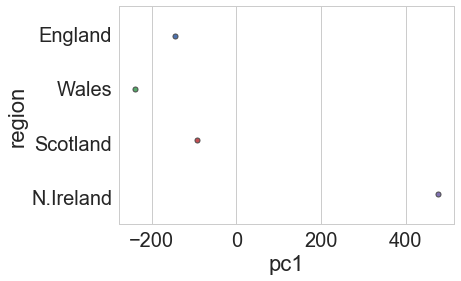

In [11]:
sns.stripplot(x="pc1",y="region", data=Xstar, jitter=0.05, linewidth=1)

Text(67.7201,0.5,'pc2')

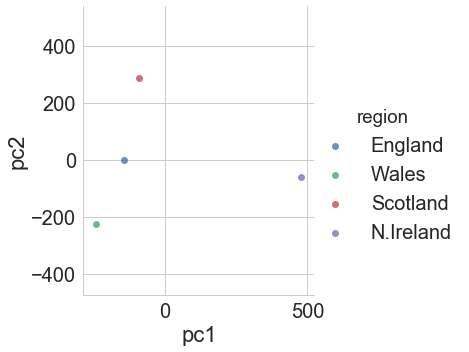

In [12]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',Xstar,hue='region', fit_reg=False)
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [13]:
def plot_arrow(v,scale,text_pos,text_label):
    plt.arrow(0, 0, scale*v[0], scale*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    plt.text(v[0]*text_pos, v[1]*text_pos, text_label, color='black', ha='center', va='center', fontsize=18)


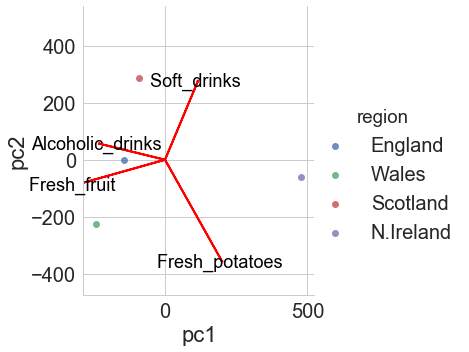

In [14]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',Xstar,hue='region', fit_reg=False)
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')

lab = ['Fresh_potatoes ',
 'Fresh_fruit ',
 'Soft_drinks ',
 'Alcoholic_drinks ']

for i,label in enumerate(lab):
    plot_arrow(components[label],500,500,label)